In [225]:
#!pip install seaborn
#!pip install tensorflow
#!pip install Plotly
#!pip install pandoc
import pandoc

Import knihoven.

In [2]:
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn import linear_model
pd.set_option("display.max_columns", None) #pro zobrazeni vsech sloupcu

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,TruncatedSVD

from sklearn.preprocessing import StandardScaler
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.model_selection import GridSearchCV

import sklearn as sk
from sklearn import svm
import pandas as pd
import os


df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

Zjistim, jakych hodnot nabyvaji sloupce. Zhodnotim sledovane parametry zamestnancu.

In [3]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [52]:
df_num = df.select_dtypes(include='number')
df_num.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Ted vyradim sloupce, ktere nemaji vyznam pro tvorbu statistiky. Hodnoty v techto sloupcich jsou bud stejne pro vsechny zamestnance(Over18, StandardHours, EmployeeCount) o to mse muzeme presvedcit v predchozi tabulce, dalsi hodnotou je EmployeeNumber, ktere je jen cislem bez jakehokoli vztahu ke statistice.

In [4]:
df1 = df.drop(["Over18", "EmployeeNumber", "StandardHours", "EmployeeCount"], axis = 1)
df_corr = df.drop(["Over18", "EmployeeNumber", "StandardHours", "EmployeeCount"], axis = 1)

Nasledne je nutne upravit sloupce se slovnim vyjadrenim vlastnosti pracovnika na hodnoty ciselne. 

In [5]:
lst = ['Attrition','MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'OverTime']
remove = list()
for i in lst:
    if (df1[i].dtype == np.str or df1[i].dtype == np.object):
        for j in df1[i].unique():
            df1[i+'_'+j] = np.where(df1[i] == j,1,0)
        remove.append(i)
df1 = df1.drop(remove, axis=1)

C:\Users\kudrn\AppData\Local\Temp\ipykernel_20732\3835211969.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df1[i].dtype == np.str or df1[i].dtype == np.object):
C:\Users\kudrn\AppData\Local\Temp\ipykernel_20732\3835211969.py:5: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if (df1[i].dtype == np.str or df1[i].dtype == np.object):


In [6]:
df1.nunique()

Age                                    43
DailyRate                             886
DistanceFromHome                       29
Education                               5
EnvironmentSatisfaction                 4
HourlyRate                             71
JobInvolvement                          4
JobLevel                                5
JobSatisfaction                         4
MonthlyIncome                        1349
MonthlyRate                          1427
NumCompaniesWorked                     10
PercentSalaryHike                      15
PerformanceRating                       2
RelationshipSatisfaction                4
StockOptionLevel                        4
TotalWorkingYears                      40
TrainingTimesLastYear                   7
WorkLifeBalance                         4
YearsAtCompany                         37
YearsInCurrentRole                     19
YearsSinceLastPromotion                16
YearsWithCurrManager                   18
Attrition_Yes                     

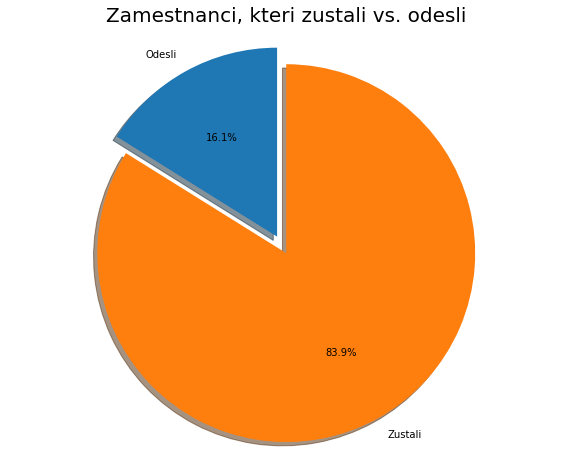

In [7]:
labels = 'Odesli', 'Zustali'
sizes = [df1.Attrition_Yes[df1['Attrition_Yes']==1].count(), df1.Attrition_Yes[df1['Attrition_Yes']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Zamestnanci, kteri zustali vs. odesli", size = 20)
plt.show()

<AxesSubplot:xlabel='OverTime', ylabel='count'>

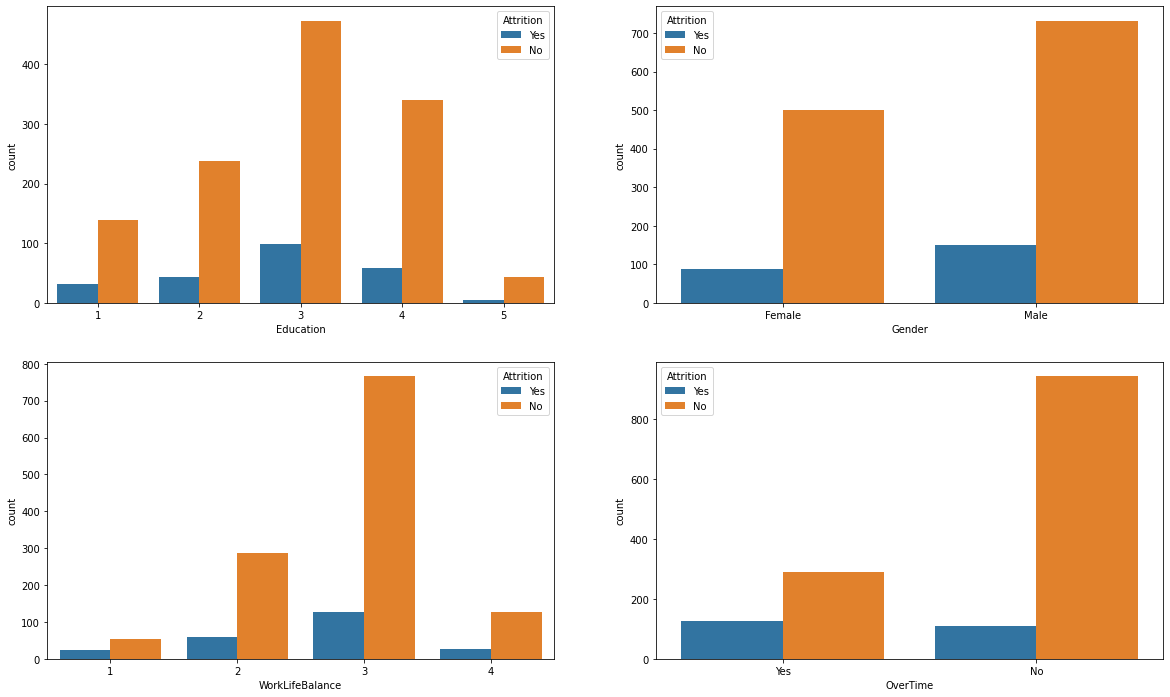

In [8]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Education', hue = 'Attrition',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Attrition',data = df, ax=axarr[0][1])
sns.countplot(x='WorkLifeBalance', hue = 'Attrition',data = df, ax=axarr[1][0])
sns.countplot(x='OverTime', hue = 'Attrition',data = df, ax=axarr[1][1])

In [63]:
print(pd.crosstab(columns=[df.Attrition],index=[df.Education],margins=True,normalize='index'))
print('\n')
print(pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins=True,normalize='index'))
print('\n')
print(pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index'))
print('\n')
print(pd.crosstab(columns=[df.Attrition],index=[df.OverTime],margins=True,normalize='index'))

Attrition        No       Yes
Education                    
1          0.817647  0.182353
2          0.843972  0.156028
3          0.826923  0.173077
4          0.854271  0.145729
5          0.895833  0.104167
All        0.838776  0.161224


Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068
All        0.838776  0.161224


Attrition              No       Yes
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471
All              0.838776  0.161224


Attrition        No       Yes
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288
All        0.838776  0.161224


<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

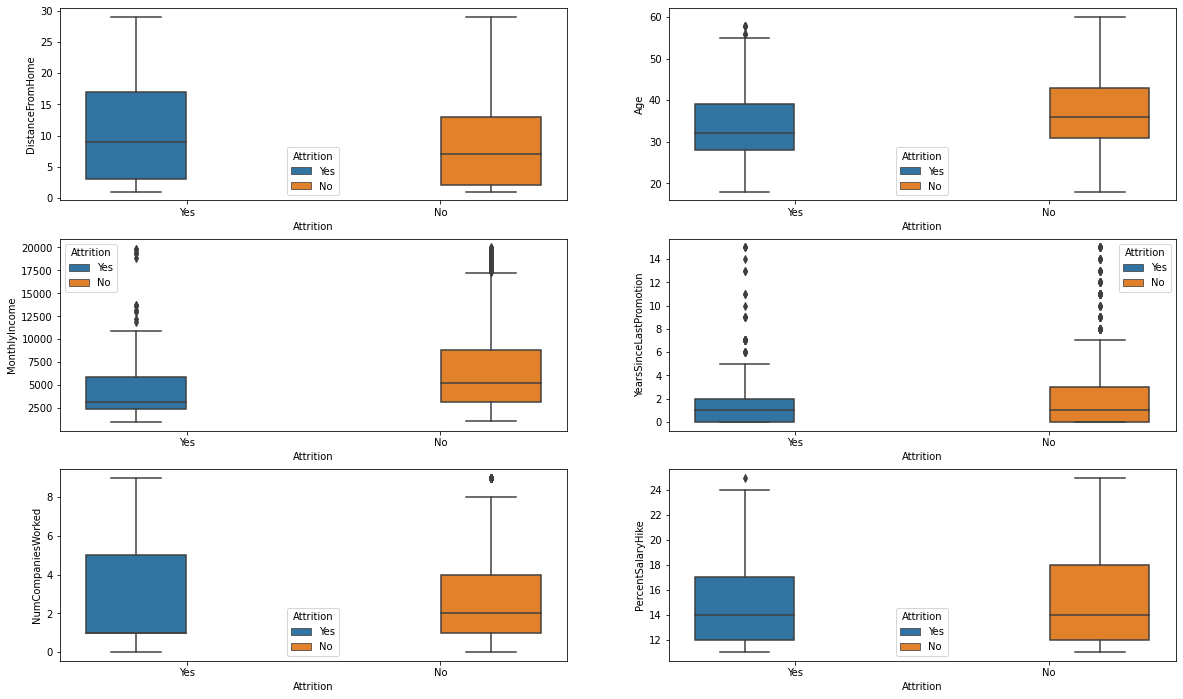

In [134]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='DistanceFromHome',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Attrition', hue = 'Attrition',data = df , ax=axarr[0][1])
sns.boxplot(y='MonthlyIncome',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[1][0])
sns.boxplot(y='YearsSinceLastPromotion',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[1][1])
sns.boxplot(y='NumCompaniesWorked',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[2][0])
sns.boxplot(y='PercentSalaryHike',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[2][1])

<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

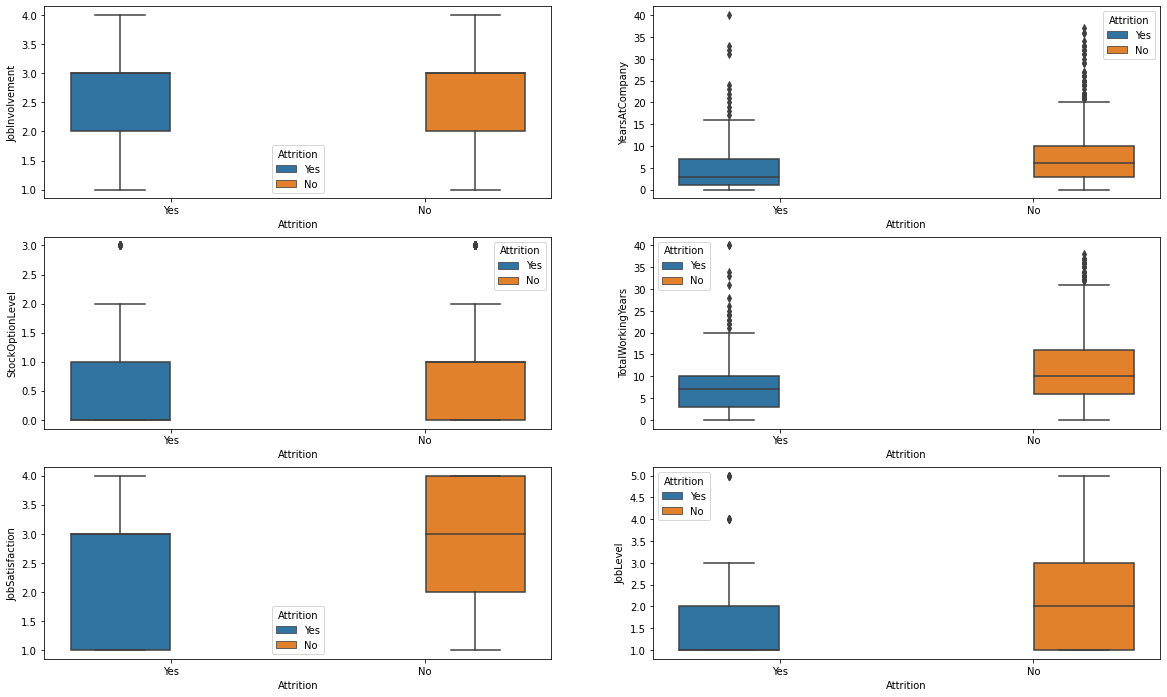

In [135]:
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='JobInvolvement',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[0][0])
sns.boxplot(y='YearsAtCompany',x = 'Attrition', hue = 'Attrition',data = df , ax=axarr[0][1])
sns.boxplot(y='StockOptionLevel',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[1][0])
sns.boxplot(y='TotalWorkingYears',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[1][1])
sns.boxplot(y='JobSatisfaction',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[2][0])
sns.boxplot(y='JobLevel',x = 'Attrition', hue = 'Attrition',data = df, ax=axarr[2][1])

In [155]:
from scipy import stats
def chi_test(df1, bi1, bi2):
    df_chi = df1
    contingency_table=pd.crosstab(df_chi[str(bi1)],df_chi[str(bi2)])
    print('contingency_table : \n',contingency_table)#Observed Values
    Observed_Values = contingency_table.values 
    #print("Observed Values :-\n",Observed_Values)

    b=stats.chi2_contingency(contingency_table)
    Expected_Values = b[3]
    print("Expected Values : \n",Expected_Values)

    no_of_rows=len(contingency_table.iloc[0:2,0])
    no_of_columns=len(contingency_table.iloc[0,0:2])
    ddof=(no_of_rows-1)*(no_of_columns-1)
    print("Degree of Freedom: ",ddof)

    alpha = 0.05
    from scipy.stats import chi2
    chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
    chi_square_statistic=chi_square[0]+chi_square[1]
    print("chi-square statistic: ",chi_square_statistic)

    critical_value=chi2.ppf(q=1-alpha,df=ddof)
    #print('critical_value:',critical_value)#p-value
    p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
    #print('p-value:',p_value)
    print('Significance level: ',alpha)
    #print('Degree of Freedom: ',ddof)
    print('chi-square statistic: ',chi_square_statistic)
    print('critical_value: ',critical_value)
    print('p-value: ',p_value)
    if chi_square_statistic>=critical_value:
        print("Reject H0")
    else:
        print("Retain H0")

    if p_value<=alpha:
        print("Reject H0")
    else:
        print("Retain H0")

### Testovani hypotez

H_0 : Neni rozdil v Attrition mezi Pohlavim                                                                                     
H_1 : Je zde rozdil v Attrition mezi Pohlavim

In [157]:
chi_test(df1, 'Gender_Female', 'Attrition_Yes')

contingency_table :-
 Attrition_Yes    0    1
Gender_Female          
0              732  150
1              501   87
Expected Values :-
 [[739.8 142.2]
 [493.2  94.8]]
Degree of Freedom:- 1
chi-square statistic:- 1.2752163602205182
Significance level:  0.05
chi-square statistic: 1.2752163602205182
critical_value: 3.841458820694124
p-value: 0.2587903704911595
Retain H0
Retain H0


H_0 : Neni rozdil v Attrition mezi Svobodnymi a ostatnimi(Married/Divorced) zamestnanci                                  
H_1 : Je zde rozdil v Attrition mezi Svobodnymi a ostatnimi(Married/Divorced) zamestnanci

In [163]:
chi_test(df1, 'Attrition_Yes', 'MaritalStatus_Single')

contingency_table :-
 MaritalStatus_Single    0    1
Attrition_Yes                 
0                     883  350
1                     117  120
Expected Values :-
 [[838.7755102 394.2244898]
 [161.2244898  75.7755102]]
Degree of Freedom:- 1
chi-square statistic:- 45.23435335701551
Significance level:  0.05
chi-square statistic: 45.23435335701551
critical_value: 3.841458820694124
p-value: 1.7481127656537865e-11
Reject H0
Reject H0


H_0 : Neni rozdil v Attrition v kategorii spokojenosti s praci.                                                             
H_1 : Je zde rozdil v Attrition v kategorii spokojenosti s praci.

In [164]:
chi_test(df1, 'Attrition_Yes', 'JobSatisfaction')

contingency_table :-
 JobSatisfaction    1    2    3    4
Attrition_Yes                      
0                223  234  369  407
1                 66   46   73   52
Expected Values :-
 [[242.40612245 234.85714286 370.73877551 384.99795918]
 [ 46.59387755  45.14285714  71.26122449  74.00204082]]
Degree of Freedom:- 1
chi-square statistic:- 9.655539523938783
Significance level:  0.05
chi-square statistic: 9.655539523938783
critical_value: 3.841458820694124
p-value: 0.0018878144066051261
Reject H0
Reject H0


Tvorba testovacich a trenovacich datasetu

In [31]:
X = df1.drop(['Attrition_Yes','Attrition_No'], axis=1)
y = df1.Attrition_Yes


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
SPcorrMatrix = df1.corr(method= 'spearman')
PEcorrMatrix = df1.corr(method= 'pearson')
KEcorrMatrix = df1.corr(method= 'kendall')

def corr_matrix(corrMatrix):
    fig, ax = plt.subplots(figsize=(15, 15))                   # Sample figsize in inches

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map
    sns.heatmap(data      = corrMatrix, 
            cmap      = cmap, 
            square    = True, 
            cbar_kws  = {'shrink': .3}, 
            annot     = False, 
            annot_kws = {'fontsize': 12},
            ax        = ax
           )
    return
    
def corr_over_K(corrMatrix, K):
    #K = 0.08
    corr = corrMatrix[(-K >= corrMatrix.Attrition_Yes)]
    corr = corr.append(corrMatrix[(K <= corrMatrix.Attrition_Yes)])
    corr = corr.drop(['OverTime_No', 'Attrition_No'])
    crK = abs(corr.Attrition_Yes)
    print(crK.sort_values())
    print(corr.index.values)
    return 


corr_over_K(KEcorrMatrix, 0.08)

Department_Sales                     0.080855
JobRole_Manufacturing Director       0.082994
JobRole_Manager                      0.083316
Department_Research & Development    0.085293
MaritalStatus_Divorced               0.087716
EnvironmentSatisfaction              0.088377
JobRole_Research Director            0.088870
MaritalStatus_Married                0.090984
JobSatisfaction                      0.094305
JobRole_Laboratory Technician        0.098290
JobInvolvement                       0.113526
BusinessTravel_Travel_Frequently     0.115143
Age                                  0.142012
YearsWithCurrManager                 0.152006
YearsInCurrentRole                   0.156711
JobRole_Sales Representative         0.157234
YearsAtCompany                       0.161006
MonthlyIncome                        0.161980
StockOptionLevel                     0.162844
TotalWorkingYears                    0.166781
MaritalStatus_Single                 0.175419
JobLevel                          

In [64]:
df1_cor = df1[['Age', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
               'MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany', 
               'YearsInCurrentRole', 'YearsWithCurrManager', 'Attrition_No', 'MaritalStatus_Married', 
               'MaritalStatus_Divorced', 'JobRole_Manufacturing Director', 'JobRole_Manager', 
               'JobRole_Research Director', 'Department_Research & Development', 
               'Attrition_Yes', 'MaritalStatus_Single', 'JobRole_Laboratory Technician', 
               'JobRole_Sales Representative', 'Department_Sales', 'BusinessTravel_Travel_Frequently', 'OverTime_Yes']]
df1_cor.head(5)

,Age,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,Attrition_No,MaritalStatus_Married,MaritalStatus_Divorced,JobRole_Manufacturing Director,JobRole_Manager,JobRole_Research Director,Department_Research & Development,Attrition_Yes,MaritalStatus_Single,JobRole_Laboratory Technician,JobRole_Sales Representative,Department_Sales,BusinessTravel_Travel_Frequently,OverTime_Yes
0,41,2,3,2,4,5993,0,8,6,4,5,0,0,0,0,0,0,0,1,1,0,0,1,0,1
1,49,3,2,2,2,5130,1,10,10,7,7,1,1,0,0,0,0,1,0,0,0,0,0,1,0
2,37,4,2,1,3,2090,0,7,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,1
3,33,4,3,1,3,2909,0,8,8,7,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1
4,27,1,3,1,2,3468,1,6,2,2,2,1,1,0,0,0,0,1,0,0,1,0,0,0,0


Porovnam redukci dimenzi celeho datasetu vs. pouze vybranych parametru z predchozi korelace.

In [32]:
X = df1.drop(['Attrition_Yes','Attrition_No'], axis=1)
y = df1.Attrition_Yes

X_cor = df1_cor.drop(['Attrition_Yes','Attrition_No'], axis=1)
y_cor = df1_cor.Attrition_Yes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_cor_train, X_cor_test, y_cor_train, y_cor_test = train_test_split(X_cor, y_cor, test_size=0.3)

In [16]:
reg = linear_model.LinearRegression()

Linearni regrese porovnani datasetu celeho...

In [17]:
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.22144218895589796

... vs. datasetu pro korelovane hodnoty s Attrition

In [18]:
reg.fit(X_cor_train,y_cor_train)
reg.score(X_cor_test,y_cor_test)

0.17334207289536452

Provedeni PCA redukce dimenzi, pro kompletni dataset, pocet dimenzi 30 rsp. 15 byl stanoven experimentalne z presnosti linearni regrese

In [19]:
pca = PCA(n_components=30, whiten='True')
x_dr = pca.fit(X).transform(X)

In [20]:
pca = PCA(n_components=15, whiten='True')
x_cor_dr = pca.fit(X_cor).transform(X_cor)

Linearni regrese po redukci dimenzi na 30 z datasetu, upraveneho na binarni hodnoty.

In [21]:
reg = linear_model.LinearRegression()
X_dr_train, X_dr_test, y_dr_train, y_dr_test = train_test_split(x_dr,y,test_size=0.2, random_state=4)
reg.fit(X_dr_train,y_dr_train)


reg.score(X_dr_test,y_dr_test)

0.21398396098043748

Muzeme sledovat, ze pomoci PCA  jsme redukovali dimenze na 30. Linearni regrese se tim mirne zlepsila. 

Linearni regrese po redukci dimenzi na z 23 na 15 u datasetu redukovaneho korelaci

In [22]:
reg = linear_model.LinearRegression()
X_cor_dr_train, X_cor_dr_test, y_cor_dr_train, y_cor_dr_test = train_test_split(x_cor_dr,y_cor,test_size=0.2, random_state=4)
reg.fit(X_cor_dr_train,y_cor_dr_train)


reg.score(X_cor_dr_test,y_cor_dr_test)

0.20536104203257777

Pokud jsme redukaovali dimenze, zlepsili jsme aproximaci modelu na dataset z 15% na 20%.

In [89]:
def RF_plot(RF,X_cor):
    trace = go.Scatter(
        y = RF.feature_importances_,
        x = X_cor.columns.values,
        mode='markers',
        marker=dict(
            sizemode = 'diameter',
            sizeref = 1,
            size = 13,
            #size= rf.feature_importances_,
            #color = np.random.randn(500), #set color equal to a variable
            color = RF.feature_importances_,
            colorscale='Portland',
            showscale=True
        ),
        text = X_cor.columns.values
    )
    data = [trace]

    layout= go.Layout(
        autosize= True,
        title= 'Random Forest Feature Importance',
        hovermode= 'closest',
         xaxis= dict(
             ticklen= 5,
             showgrid=False,
            zeroline=False,
            showline=False
         ),
        yaxis=dict(
            title= 'Feature Importance',
            showgrid=False,
            zeroline=False,
            ticklen= 5,
            gridwidth= 2
        ),
        showlegend= False
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig,filename='scatter2010')

### Random forest clasifikace. Dataset cely.

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

RF=RandomForestClassifier(n_estimators=100)

RF.fit(X_train,y_train)

y_pred=RF.predict(X_test)
RF_plot(RF,X_train)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
RF_plot(RF,X_cor)

Accuracy: 0.8707482993197279


V grafu muzeme sledovat jake parametry jsou v modelu povazovany za stezejni k urceni Odchodu zamestnance

Model odhali Odchod zamestnancu s presnosti cca 86%, coz je jen o 2% lepsi nez nahodne urceni Odchodu zamestnance.

### RF pro korelovany dataset.

Accuracy: 0.8435374149659864


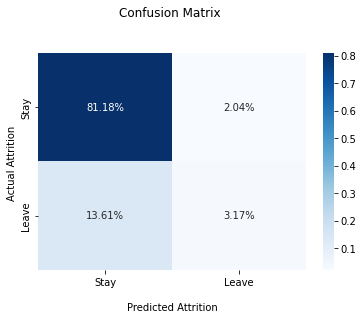

In [123]:
RF=RandomForestClassifier(n_estimators=100)

RF.fit(X_cor_train,y_cor_train)

y_pred=RF.predict(X_cor_test)

print("Accuracy:",metrics.accuracy_score(y_cor_test, y_pred))
CM_plot(y_cor_test, y_pred)
RF_plot(RF,X_cor)

### RF pro cely dataset, s redukci dimenze na 20

Accuracy: 0.8741496598639455


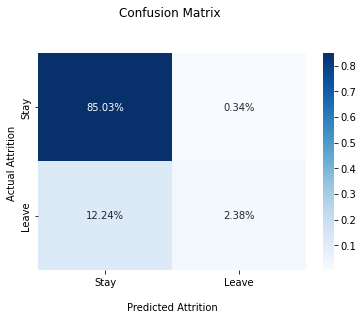

In [109]:
RF=RandomForestClassifier(n_estimators=100)

RF.fit(X_dr_train,y_dr_train)

y_pred=RF.predict(X_dr_test)

print("Accuracy:",metrics.accuracy_score(y_dr_test, y_pred))

from sklearn.metrics import confusion_matrix
def CM_plot(test, prediction):
    
    RF_CM = confusion_matrix(test, prediction)
    
    ax = sns.heatmap(RF_CM/np.sum(RF_CM), annot=True, 
            fmt='.2%', cmap='Blues')

    ax.set_title('Confusion Matrix \n\n');
    ax.set_xlabel('\nPredicted Attrition')
    ax.set_ylabel('Actual Attrition ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Stay','Leave'])
    ax.yaxis.set_ticklabels(['Stay','Leave'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()
    
    
CM_plot(y_dr_test, y_pred)

### RF pro korelovany dataset s redukci dimenze na 15

Accuracy: 0.8809523809523809


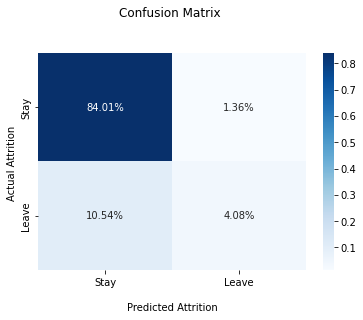

In [110]:
RF=RandomForestClassifier(n_estimators=100)

RF.fit(X_cor_dr_train,y_cor_dr_train)

y_pred=RF.predict(X_cor_dr_test)

print("Accuracy:",metrics.accuracy_score(y_cor_dr_test, y_pred))
CM_plot(y_cor_dr_test, y_pred)

Z predchozich grafu muzeme vycist jake parametry, jsou dulezite pro rozhodovani v algoritmu RF. 
Podobne grafy muzeme vytvorit take pro RF klasifikatory, trenovane na datasetu s redukovanymi dimenzemi, 
bohuzel nejsme schopni interpretovat jednotlive parametry.

###### Nejvyssi presnosti dosahl model trenovany na datasetu s vybranymi hodnotami korelujicimi s Odchodem zamestnancu, ktery byl nadale redukovan v poctu dimenzi. 

### Linearni Support Vector Classifier

Metodu LinSVC, jako predesle metody otestujeme na redukovanem datasetu, ktery dosahl nejlepsiho vysledku pri linearni regresy a take puvodnim datasetu.

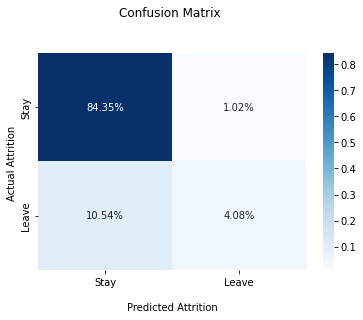

In [173]:
SVM = svm.LinearSVC(max_iter=10000)
SVM.fit(X_cor_dr_train, y_cor_dr_train)
y_pred=SVM.predict(X_cor_dr_test)
SVM.score(X_cor_dr_test,y_cor_dr_test)
CM_plot(y_cor_dr_test, y_pred)

c:\users\kudrn\pycharmprojects\san\venv\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



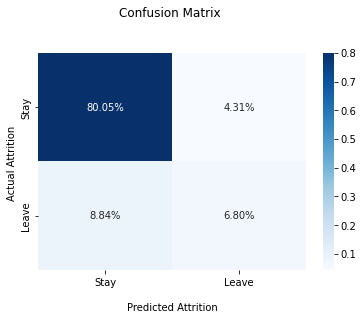

In [168]:
SVM = svm.LinearSVC(max_iter=90000000) # 90 000 000 iter cas: 1h++ 
SVM.fit(X_train, y_train)
y_pred=SVM.predict(X_test)
SVM.score(X_test,y_test)
CM_plot(y_test, y_pred)

Pri treninku modelu na celem datasetu, nikterak zredukovanem je potreba navysit pocet iteraci, aby metoda konvergovala. V pripade ponechani stejneho poctu iteraci, model zaradi veskere zamestnance do skupiny 'Zustanou'(Attrition_No) a je spokojeny s pravdepodobnosti 84%, coz je presne podil zamestnancu, kteri firmu neopusti. S navysenim poctu iteraci pri tolika dimenzich nesmirne roste vypocetni cas. Tento vypocet trval dele nez hodinu. Ale zato jsme vytvorili model, ktery je podobne presny jako Neuronova sit.

### Tvorba vlastni neuronove site

Architektura site byla sestavena dle parametru pro nejlepsi uceni site na datech ktere mame k dispozici. Trenovani a validaci site provedeme nejdive na korelovanem datasetu s redukci dimenzi.

In [120]:
sc = StandardScaler()
X_crossVal = sc.fit_transform(X_cor_train)
X_cor_train_NN = sc.fit_transform(X_cor_train)
X_cor_test_NN = sc.transform(X_cor_test)

dropout = 0.1
epochs = 100
batch_size = 30
optimizer = 'adam'
k = 20


def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'tanh', input_shape = (X_cor_train_NN.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(8, kernel_initializer="truncated_normal", activation = 'tanh', ))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
accuracies = cross_val_score(estimator = classifier, X = X_cor_train_NN, y = y_cor_train, cv = 30)
max = accuracies.max()

C:\Users\kudrn\AppData\Local\Temp\ipykernel_20732\214253506.py:22: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.



Best accuracy:  0.9411764740943909


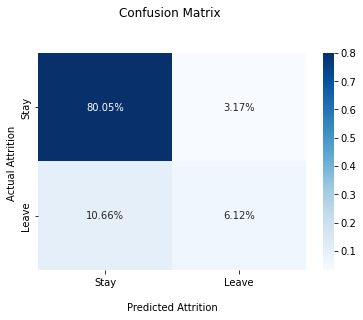

In [219]:
print("Best accuracy: ",max)
classifier.fit(X_cor_train_NN, y_cor_train)
pred = classifier.predict(X_cor_test_NN)
CM_plot(y_cor_test, pred)

Sit behem crosvalidace dosahla nejvyssi presnosti 94%, pokud se ale podivame na confusion matrix, dozvime se ze odchod zamestnance predpovime poze v 9%, z toho spravne pouze u 6% zamestnancu, to pokud se v spolecnosti vyskytuje 16% zamestnancu, kteri chteji spolecnost opustit neni nase presnost odhadu ani 50% a tudiz se na vetsi cast zamestnancu nezamerime a muzeme pouze eliminovat odchod ne mu plne zabranit.

Trenink site na uplnem datasetu. Provadime pro srovnani s vysledky predchoziho treninku na redukovanem datasetu. S myslenkou uspory vypocetniho casu.

In [221]:
sc = StandardScaler()
X_crossVal = sc.fit_transform(X_train)
X_cor_train_NN = sc.fit_transform(X_train)
X_cor_test_NN = sc.transform(X_test)

dropout = 0.1
epochs = 100
batch_size = 30
optimizer = 'adam'
k = 20


def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(16, kernel_initializer="truncated_normal", activation = 'tanh', input_shape = (X_cor_train_NN.shape[1],)))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(8, kernel_initializer="truncated_normal", activation = 'tanh', ))
    classifier.add(Dropout(dropout))
    classifier.add(Dense(1, kernel_initializer="truncated_normal", activation = 'sigmoid', )) #outputlayer
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ["accuracy"])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, batch_size = batch_size, epochs = epochs, verbose=0)
accuracies = cross_val_score(estimator = classifier, X = X_cor_train_NN, y = y_train, cv = 30)
max = accuracies.max()

C:\Users\kudrn\AppData\Local\Temp\ipykernel_20732\2185062598.py:22: DeprecationWarning:

KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.



Best accuracy:  1.0


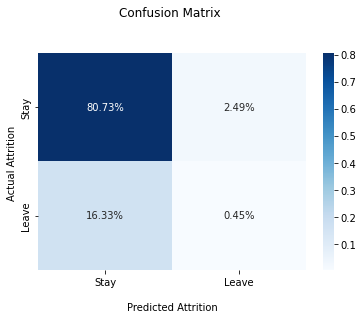

In [222]:
print("Best accuracy: ",max)
classifier.fit(X_cor_train_NN, y_cor_train)
pred = classifier.predict(X_cor_test_NN)
CM_plot(y_cor_test, pred)

Sit behem crosvalidace dosahla nejvyssi presnosti 100%, pokud se ale podivame na confusion matrix, dozvime se ze odchod zamestnance predpovime poze ve 3%, z toho spravne pouze u 0.45% zamestnancu. 

Navzdory velmi komplexnimu datasetu, ve kterem nechybeli data, a pri prvnim pohledu by se zdalo, ze zde musime najit zavislost odchodu zamestnancu s nekterym parametrem, neni to zdaleka jednoduchy ukol, se kterym by si vytvorene modely snadno poradily.  

Z grafu a nasledneho testovani hypotez je mozne sledovat ze jsou ruzna rozdeleni v ruznych skupinach zamestnancu. Provedl jsem chi kvadrat test, ktery odhalil, ze neni stejny podil v zamestnancihc kteri odchazi mezi svobodnymi a ostatnimi zamestnanci, a take pri ruzne spokojenosti se zamestnanim neni stejna mira odchodu ze zamestnani test jsem provedl na hladine vyznamnosti 0,95.

S myslenkou uspory vypocetniho casu a zmensenim dimenze prostoru s daty, jsem se rozhodl z datasetu vybrat parametry, ktere koreluji s Odchodem zamestnancu, jak pozitivne tak negativne. Hladinu jsem urcil jako 0,8, toto cislo jsem zvolil odhadem z korelovanych parametru, kde se na hodnote 0,8 vyzname lamala korelace. Dale jsem pomoci metody PCA redukoval dimenze a sledoval jak ze bude menit presnost linearni regrese. To jsem provedl jednak pro puvodni dataset a take pro dataset jiz vybranych hodnot. Nejlepsiho vysledku v linearni regresi dosahl dataset jiz redukovany rucne a pote s naslednou redukci dimenze na 15 dimenzi.

Predchozim zjednodusovanim datasetu jsem vytvoril 4 ruzne datasety, vytvoril jsem modely Random Forest, trenovane na jednotlivych datasetech. Sledoval jsem presnost modelu na konofrmacnich maticich. Nejlepsiho vysledku dosahl model trenovany na datasetu s nejmensim poctem dimenzi, tedy predvybranemu z korelovanych hodnot a nadale redukovanym na 15 dimenzi.

Dale jsem vytvoril Linearni Support Vector Classifier, a trenoval ho jiz na dvou datasetech, v prvnim pripade na redukovanem datasetu s 15 dimenzemi, zde trenink probehl velmi rychle ale presnost nebyla vysoka. Druhy model byl trenovan na datasetu puvodnim, zde trenink trval vice nez hodinu, ale presnost byla vyrazne lepsi.

Jako posledni model jsem vytvoril model neuronove site. Neuronova sit dosahla srovnatelne presnosti s LinSVC trenovane na celem datasetu. Vyhodou je ze trenink trval zlomek casu. Dale lepsich vysledku dosahla sit trenovana na redukovanem datasetu s 15 parametry.

Celkove me prekvapilo, ze lepsich vysledku dosahly modely, trenovane na redukovanych datasetech, z toho co jsem nastudoval o pouzitych modelech, bych cekal, ze modely budou schopny ignorovat vlastnosti, ktere nejsou potreba k spravnemu urceni Odchodu zamestnance. Specialne neuronove site, ktere vytvareji 'vahy' jdnotlivych vstupnich parametru.